In [1]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

# Generate a moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=808)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=808)

# Define XGBoost model
model = xgb.XGBClassifier(eval_metric="logloss", random_state=808)

# Define hyperparameter distributions
param_dist = {
    "n_estimators": randint(50, 300), # pick direction of steepest loss, gradient descent. # of trees, # of learners
    "learning_rate": uniform(0.01, 0.3), # how much we are going to change the parameter value. Start the distribution at 0.01, and the range is 0.3. (0.01:0.31), values from 0.01 to 0.31
    "max_depth": randint(2, 10), # range 2-10
    "subsample": uniform(0.5, 0.5), # subsample features, using less than the full number of obs in the data set. Adds stochasticity. First arg=starting point, second arg=range
    "colsample_bytree": uniform(0.5, 0.5) # subsample data. Adds stochasticity

}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_dist, n_iter=20, scoring='accuracy', 
    cv=3, verbose=False, random_state=808
)

# Run random search
random_search.fit(X_train, y_train)

# Get search results as a DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Extract hyperparameters and accuracy
params_to_plot = ['param_learning_rate', 'param_n_estimators', 
                'param_max_depth', 'param_subsample', 'param_colsample_bytree']

accuracy = results['mean_test_score']


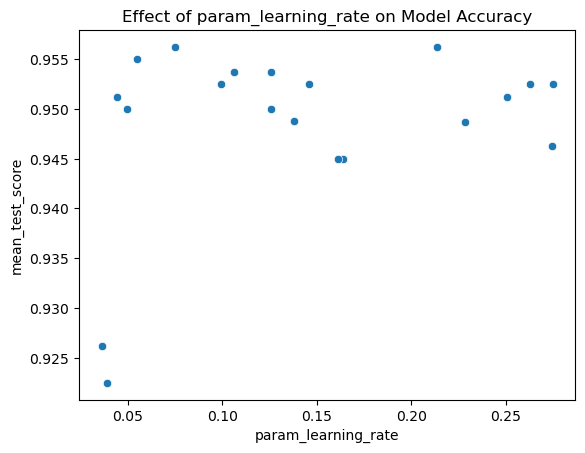

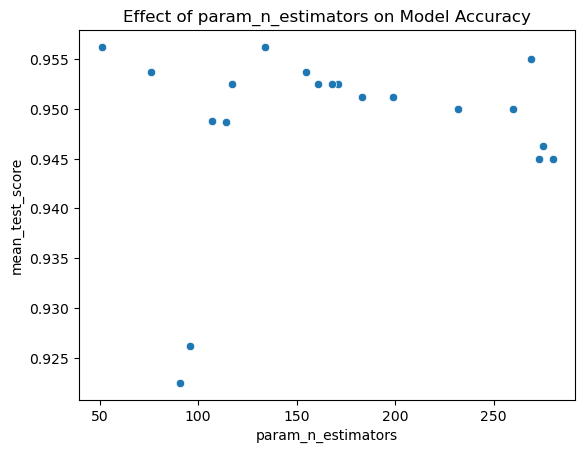

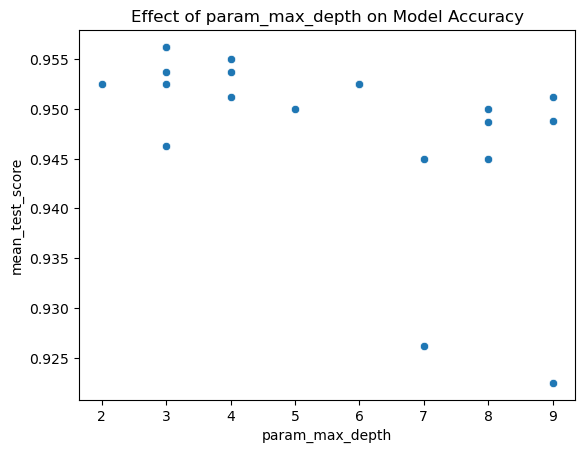

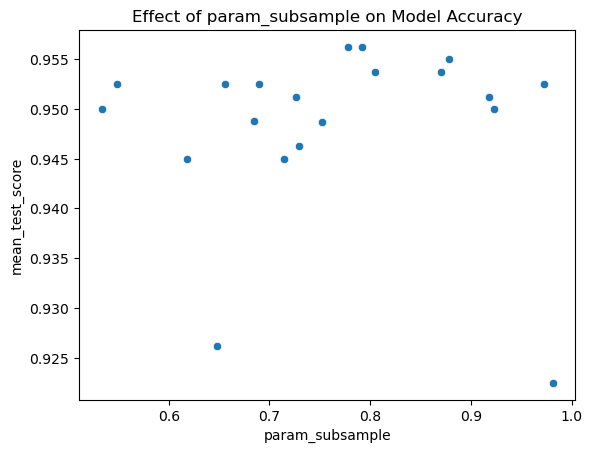

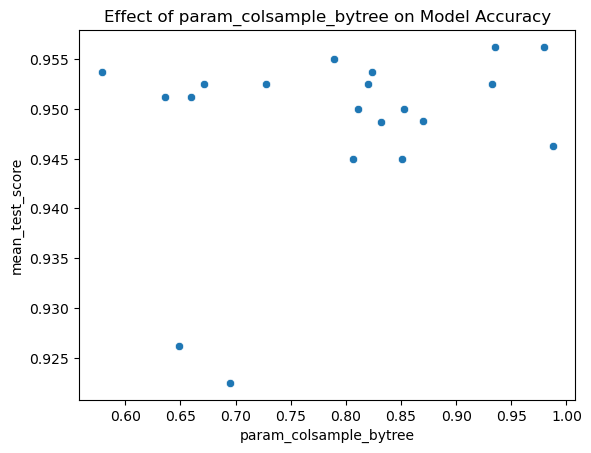

In [2]:
# Generate scatter plots for each hyperparameter vs. accuracy
for param in params_to_plot:
    sns.scatterplot(x=results[param], y=accuracy),
    plt.title(f'Effect of {param} on Model Accuracy')
    plt.show()